In [2]:
%matplotlib inline

In [3]:
from rescale_dc2.load_halos import list_available_protoDC2_fof_fnames
pdc2_fof_halos_fname = list_available_protoDC2_fof_fnames()[-1]

from rescale_dc2.load_halos import list_available_bpl_halo_fnames
bolshoi_halos_fname = list_available_bpl_halo_fnames()[-1]

from rescale_dc2.load_umachine_mocks import list_available_umachine_fnames
umachine_fname = list_available_umachine_fnames()[-1]


In [5]:

from rescale_dc2.load_end_to_end import dc2_with_sdss_restframe_ugriz
dc2, umachine, sdss = dc2_with_sdss_restframe_ugriz(
    umachine_fname, bolshoi_halos_fname, pdc2_fof_halos_fname)

    

In [ ]:
from rescale_dc2.load_halos import load_protoDC2_fof_halos
from rescale_dc2.load_halos import list_available_protoDC2_fof_fnames

fname = list_available_protoDC2_fof_fnames()[-1]
pdc2_halos = load_protoDC2_fof_halos(fname)

In [ ]:
from rescale_dc2.load_halos import load_bolshoi_planck_halos
from rescale_dc2.load_halos import list_available_bpl_halo_fnames

fname = list_available_bpl_halo_fnames()[-1]
rockstar_halos = load_bolshoi_planck_halos(fname)

In [ ]:
from rescale_dc2.load_umachine_mocks import load_umachine_and_value_added_halos
from rescale_dc2.load_umachine_mocks import list_available_umachine_fnames
fname = list_available_umachine_fnames()[-1]

umachine, bpl_halos = load_umachine_and_value_added_halos(fname, rockstar_halos)

In [ ]:
from rescale_dc2.nearest_umachine_halo_selection import source_halo_selection_indices

halo_selection_indices = source_halo_selection_indices(
    bpl_halos['log10_cumulative_nd_mvir'], 
    pdc2_halos['log10_cumulative_nd_mvir'])

In [ ]:
from rescale_dc2.nearest_umachine_halo_selection import value_add_matched_target_halos
pdc2_halos = value_add_matched_target_halos(bpl_halos, pdc2_halos, halo_selection_indices)


In [ ]:
from rescale_dc2.nearest_umachine_halo_selection import source_galaxy_selection_indices
galaxy_selection_indices = source_galaxy_selection_indices(
    pdc2_halos, halo_selection_indices)

In [ ]:
from rescale_dc2.nearest_umachine_halo_selection import create_galsampled_dc2

dc2 = create_galsampled_dc2(umachine, pdc2_halos, 
                            halo_selection_indices, galaxy_selection_indices)

In [ ]:
from rescale_dc2.value_add_umachine_catalogs import add_ssfr
dc2 = add_ssfr(dc2)

In [ ]:
from rescale_dc2.load_catalogs import load_dc2_sdss
sdss = load_dc2_sdss()

In [ ]:
from rescale_dc2.rescale_snapshot import assign_sdss_restframe_absolute_ugriz
dc2 = assign_sdss_restframe_absolute_ugriz(dc2, sdss)


In [ ]:
print(dc2.keys())

In [ ]:
def add_ssfr(catalog):
    sfr = np.copy(catalog['obs_sfr'])
    zero_mask = sfr == 0.
    nzeros = np.count_nonzero(zero_mask)
    logsm = np.log10(catalog['obs_sm'])
    x_table = [8, 12]
    y_table = [-5, -2]
    noisy_logsm = logsm + np.random.normal(loc=0, scale=0.2, size=len(logsm))
    loc = np.interp(noisy_logsm, x_table, y_table)

    sfr[zero_mask] = 10**np.random.normal(loc=loc[zero_mask], scale=.25)
    ssfr = sfr/catalog['obs_sm']
    catalog['obs_ssfr'] = np.log10(ssfr)
    return catalog


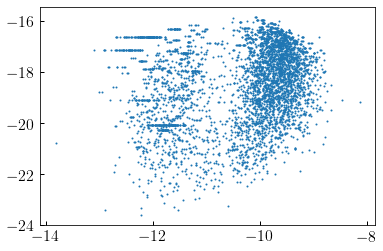

In [6]:
fig, ax = plt.subplots(1, 1)

# dc2 = add_ssfr(dc2)

mask = dc2['obs_sm'] > 0
nskip = 500

# xscale = ax.set_xscale('log')
__=ax.scatter(dc2['obs_ssfr'][::nskip], dc2['AbsMagr'][::nskip], s=1)

# ylim = ax.set_ylim(-15, -25)